In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import os
import matplotlib.pyplot as plt
#encoder dataset
from sklearn.preprocessing import LabelEncoder
#standardScalern
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#minmaxScaler
from sklearn.preprocessing import MinMaxScaler
#for create model
from sklearn.linear_model import LinearRegression

In [71]:
#print names of files in ML_assignment folder
print(os.listdir())

['.ipynb_checkpoints', 'Assignment2.ipynb', 'Assignment2Final.ipynb', 'data_cleaning.ipynb', 'loan.csv', 'sample', 'Used_car_prices_in_Pakistan 2021_rawD.csv']


In [72]:
#import data-set
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv")

In [73]:
#first five rows
df.head()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
0,Honda,Insight,NaN,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual


In [74]:
#last five rows
df.tail()

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission
80567,Suzuki,Bolan,NaN,750000.0,2015,800,Local,98000,Lahore,Manual
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual
80571,Honda,Civic,VTi Prosmatec 1.8 i-VTEC,2620000.0,2013,1800,Imported,100000,Islamabad,Automatic


In [75]:
#shape of the dataset
df.shape

(80572, 10)

# Data Cleaning : Detecting NAN values

In [76]:
#Number of null value
df.isnull().sum()

Make                  0
Model                 0
Version            6772
Price                 0
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

# Detecting null values

In [77]:
missing_value=["NaN","Call for price",np.nan]
df = pd.read_csv("Used_car_prices_in_Pakistan 2021_rawD.csv", na_values=missing_value)

In [78]:
df.isnull().any()

Make               False
Model              False
Version             True
Price               True
Make_Year          False
CC                 False
Assembly           False
Mileage            False
Registered City    False
Transmission       False
dtype: bool

In [79]:
#Number of null value
df.isnull().sum()

Make                  0
Model                 0
Version            6772
Price              1209
Make_Year             0
CC                    0
Assembly              0
Mileage               0
Registered City       0
Transmission          0
dtype: int64

In [80]:
# Mean value % in null values
df.isnull().mean()

Make               0.000000
Model              0.000000
Version            0.084049
Price              0.015005
Make_Year          0.000000
CC                 0.000000
Assembly           0.000000
Mileage            0.000000
Registered City    0.000000
Transmission       0.000000
dtype: float64

<AxesSubplot:>

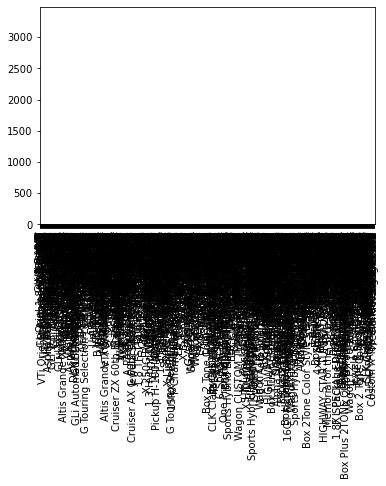

In [81]:
df['Version'].value_counts().plot.bar()

In [82]:
#display null values using graph
#sns.heatmap(df.isnull(), yticklabels=False, annot=True)

# Add mean value in 'version' variable to the null values

In [83]:
df['Version'].mode()


0    GLi 1.3 VVTi
dtype: object

In [84]:
df['Version'].fillna('GLi 1.3 VVTi', inplace=True)

In [85]:
df['Version'].isnull().sum()

0

<AxesSubplot:>

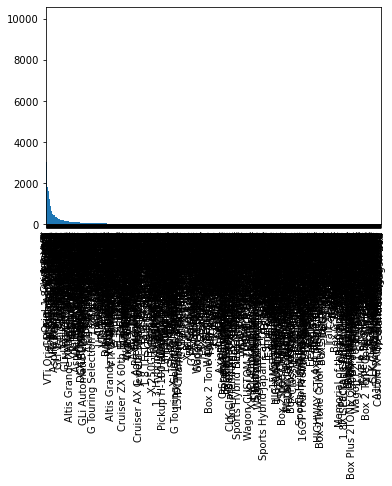

In [86]:
df['Version'].value_counts().plot.bar()

In [87]:
df['Price'].mode()

0    750000.0
dtype: float64

In [88]:
df['Price'].fillna('750000.0', inplace=True)

In [89]:
df['Price'].isnull().sum()

0

<AxesSubplot:>

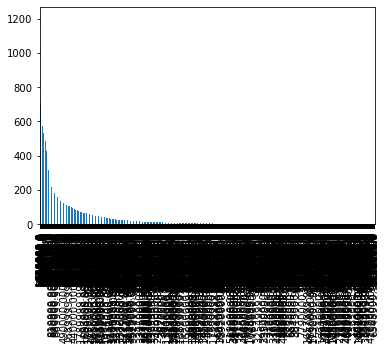

In [90]:
df['Price'].value_counts().plot.bar()

# Data Preprocessing

# 3.1 LableEncoder

In [91]:
# data types in each colunm
df.dtypes

Make               object
Model              object
Version            object
Price              object
Make_Year           int64
CC                  int64
Assembly           object
Mileage             int64
Registered City    object
Transmission       object
dtype: object

# 3.1.1 LableEncoding an 'Make' variable (one-hot encoding)

In [92]:
df['Make'].unique()

array(['Honda', 'Mitsubishi', 'Audi', 'Toyota', 'Daihatsu', 'Suzuki',
       'MG', 'KIA', 'Hyundai', 'Land', 'Mercedes', 'Changan', 'Nissan',
       'Subaru', 'Lexus', 'FAW', 'Range', 'Volkswagen', 'Chevrolet',
       'Ford', 'Proton', 'BMW', 'Mazda', 'Isuzu', 'Adam', 'Others',
       'United', 'Prince', 'Porsche', 'Daewoo', 'Chery', 'Daehan',
       'Citroen', 'Hummer', 'Buick', 'Jeep', 'JAC', 'DFSK', 'JMC', 'JW',
       'Tesla', 'ZOTYE', 'Datsun', 'Bentley', 'Master', 'Plymouth',
       'Chrysler', 'Dodge', 'GMC', 'Sogo', 'Volvo', 'Hino', 'Fiat',
       'Jaguar', 'Peugeot', 'SsangYong', 'Cadillac', 'MINI', 'Roma',
       'Sokon', 'Jinbei', 'Golden', 'Renault', 'Dongfeng', 'Rover',
       'Geely'], dtype=object)

In [93]:
encode = LabelEncoder()

In [94]:
encode.fit_transform(df['Make'])

array([25, 43,  1, ..., 61, 18, 25])

In [95]:
df['Make_label']=encode.fit_transform(df['Make'])

In [96]:
df['Make_label'].value_counts()

61    29793
59    24209
25    15186
14     3016
35     1321
      ...  
34        1
52        1
3         1
54        1
22        1
Name: Make_label, Length: 66, dtype: int64

In [97]:
df['Make'].value_counts()

Toyota      29793
Suzuki      24209
Honda       15186
Daihatsu     3016
KIA          1321
            ...  
Jinbei          1
Renault         1
Bentley         1
Rover           1
Geely           1
Name: Make, Length: 66, dtype: int64

# Start one-hot encoding

In [98]:
add_columns = pd.get_dummies(df['Make'])

In [99]:
add_columns

,Adam,Audi,BMW,Bentley,Buick,Cadillac,Changan,Chery,Chevrolet,Chrysler,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
80569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
80570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df.join(add_columns)

,Make,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Honda,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,...,0,0,0,0,0,0,0,0,0,0
1,Mitsubishi,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
2,Audi,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,Toyota,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
4,Honda,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Suzuki,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,...,0,0,0,1,0,0,0,0,0,0
80568,Suzuki,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,...,0,0,0,1,0,0,0,0,0,0
80569,Toyota,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,...,0,0,0,0,0,1,0,0,0,0
80570,FAW,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,...,0,0,0,0,0,0,0,0,0,0


In [101]:
df.drop(['Make'], axis = 1, inplace = True)

In [102]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Assembly', 'Mileage',
       'Registered City', 'Transmission', 'Make_label'],
      dtype='object')

In [103]:
df = df.join(add_columns)

In [104]:
df

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Sokon,SsangYong,Subaru,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,0,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,0,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,0,0,0
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,0,0,0,1,0,0,0,0,0,0
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,0,0,0,1,0,0,0,0
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,0,0,0


# 3.1.2 LableEncoding an 'Assembly' variable (one-hot encoding)

In [105]:
df['Assembly'].unique()

array(['Imported', 'Local'], dtype=object)

In [106]:
encode = LabelEncoder()

In [107]:
encode.fit_transform(df['Assembly'])

array([0, 0, 1, ..., 1, 1, 0])

In [108]:
df['Assembly_label']=encode.fit_transform(df['Assembly'])

In [109]:
df['Assembly_label'].value_counts()

1    54498
0    26074
Name: Assembly_label, dtype: int64

In [110]:
df['Assembly'].value_counts()

Local       54498
Imported    26074
Name: Assembly, dtype: int64

# Start one-hot encoding

In [111]:
add_columns = pd.get_dummies(df['Assembly'])

In [112]:
add_columns

,Imported,Local
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,0,1
80570,0,1


In [113]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Assembly,Mileage,Registered City,Transmission,Make_label,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,Imported,2000,Un-Registered,Automatic,25,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,Imported,68000,Lahore,Automatic,43,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,Local,70000,Lahore,Automatic,1,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,Imported,99900,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,Local,55000,Islamabad,Manual,25,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,Local,98000,Lahore,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,Local,7800,Karachi,Manual,59,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,Local,81000,Islamabad,Automatic,61,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,Local,2,Lahore,Manual,18,...,0,0,0,0,0,0,0,1,0,1


In [114]:
df.drop(['Assembly'], axis = 1, inplace = True)

In [115]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Transmission', 'Make_label', 'Adam', 'Audi', 'BMW',
       'Bentley', 'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet',
       'Chrysler', 'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun',
       'Dodge', 'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden',
       'Hino', 'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW',
       'Jaguar', 'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI',
       'Master', 'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others',
       'Peugeot', 'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range',
       'Renault', 'Roma', 'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru',
       'Suzuki', 'Tesla', 'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE',
       'Assembly_label'],
      dtype='object')

In [116]:
df = df.join(add_columns)

In [117]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,Suzuki,Tesla,Toyota,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,0,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,0,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,0,0,0,1,0,1
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,1,0,0,0,0,0,0,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,1,0,0,0,0,1,0,1
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,0,0,0,1,0,1


# 3.1.3 LableEncoding an 'Transmission' variable (one-hot encoding)

In [118]:
df['Transmission'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [119]:
encode = LabelEncoder()

In [120]:
encode.fit_transform(df['Transmission'])

array([0, 0, 0, ..., 0, 1, 0])

In [121]:
df['Transmission_label']=encode.fit_transform(df['Transmission'])

In [122]:
df['Transmission_label'].value_counts()

0    40408
1    40164
Name: Transmission_label, dtype: int64

In [123]:
df['Transmission'].value_counts()

Automatic    40408
Manual       40164
Name: Transmission, dtype: int64

# Start one-hot encoding

In [124]:
add_columns = pd.get_dummies(df['Transmission'])

In [125]:
add_columns

,Automatic,Manual
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
80567,0,1
80568,0,1
80569,1,0
80570,0,1


In [126]:
df.join(add_columns)

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Transmission,Make_label,Adam,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,Automatic,25,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,Automatic,43,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,Automatic,1,0,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,Automatic,61,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,Manual,25,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,Manual,59,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,Automatic,61,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,Manual,18,0,...,0,0,0,0,1,0,1,1,0,1


In [127]:
df.drop(['Transmission'], axis = 1, inplace = True)

In [128]:
df.columns


Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label'],
      dtype='object')

In [129]:
df = df.join(add_columns)

In [130]:
df

,Model,Version,Price,Make_Year,CC,Mileage,Registered City,Make_label,Adam,Audi,...,United,Volkswagen,Volvo,ZOTYE,Assembly_label,Imported,Local,Transmission_label,Automatic,Manual
0,Insight,GLi 1.3 VVTi,7400000.0,2019,1500,2000,Un-Registered,25,0,0,...,0,0,0,0,0,1,0,0,1,0
1,Minica,Black Minica,1065000.0,2019,660,68000,Lahore,43,0,0,...,0,0,0,0,0,1,0,0,1,0
2,A6,1.8 TFSI Business Class Edition,9300000.0,2015,1800,70000,Lahore,1,0,1,...,0,0,0,0,1,0,1,0,1,0
3,Aqua,G,2375000.0,2014,1500,99900,Islamabad,61,0,0,...,0,0,0,0,0,1,0,0,1,0
4,City,1.3 i-VTEC,2600000.0,2017,1300,55000,Islamabad,25,0,0,...,0,0,0,0,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80567,Bolan,GLi 1.3 VVTi,750000.0,2015,800,98000,Lahore,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80568,Alto,VXR,1480000.0,2020,660,7800,Karachi,59,0,0,...,0,0,0,0,1,0,1,1,0,1
80569,Corolla,GLi Automatic 1.3 VVTi,2700000.0,2016,1300,81000,Islamabad,61,0,0,...,0,0,0,0,1,0,1,0,1,0
80570,X-PV,Standard,600000.0,2013,1000,2,Lahore,18,0,0,...,0,0,0,0,1,0,1,1,0,1


# 3.32 StandarScaler

In [131]:
df.dtypes

Model                 object
Version               object
Price                 object
Make_Year              int64
CC                     int64
                       ...  
Imported               uint8
Local                  uint8
Transmission_label     int32
Automatic              uint8
Manual                 uint8
Length: 80, dtype: object

In [132]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label', 'Automatic', 'Manual'],
      dtype='object')

In [133]:
X = df.iloc[:, [3,4]]
y = df.iloc[:, 2]

In [134]:
X.head()

,Make_Year,CC
0,2019,1500
1,2019,660
2,2015,1800
3,2014,1500
4,2017,1300


In [135]:
#create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [136]:
X_train.head()

,Make_Year,CC
66779,2010,800
25178,2017,1500
58113,2013,1300
21750,2007,1000
56382,2011,660


In [141]:
scaler = StandardScaler().fit(X_train)

In [142]:
print(scaler)

StandardScaler()


In [143]:
#means of x values
scaler.mean_

array([2011.71260488, 1405.17077893])

In [144]:
#variance of x values
scaler.scale_

array([  6.9490547 , 686.12926077])

In [145]:
#transform values
scaler.transform(X_train)

array([[-0.24645149, -0.88200695],
       [ 0.76087977,  0.13820897],
       [ 0.18526191, -0.15328129],
       ...,
       [-1.10987828,  0.86693464],
       [ 0.76087977, -0.88200695],
       [-1.82940061,  0.28395411]])

In [146]:
X_train_scaled = scaler.transform(X_train)

In [147]:
#Standarlize values
print(X_train_scaled)

[[-0.24645149 -0.88200695]
 [ 0.76087977  0.13820897]
 [ 0.18526191 -0.15328129]
 ...
 [-1.10987828  0.86693464]
 [ 0.76087977 -0.88200695]
 [-1.82940061  0.28395411]]


In [148]:
print(X_train_scaled.mean(axis=0))

[5.99764786e-15 5.36178801e-17]


In [149]:
#StandardDevation
print(X_train_scaled.std(axis=0))

[1. 1.]


In [ ]:
#test set

In [152]:
X_test.head()

,Make_Year,CC
10753,1998,1800
42220,2017,800
21212,2018,800
26548,2016,1000
11191,2008,1300


In [153]:
scaler = StandardScaler().fit(X_test)

In [154]:
scaler.mean_

array([2011.75902299, 1400.82073177])

In [155]:
scaler.scale_

array([  6.96612857, 679.39268131])

In [156]:
scaler.transform(X_test)

array([[-1.97513193,  0.58755309],
       [ 0.75235146, -0.88434973],
       [ 0.89590322, -0.88434973],
       ...,
       [-0.25251084, -0.14839832],
       [ 0.46524795,  1.91226562],
       [ 1.32655849,  2.0594559 ]])

In [157]:
#save above result in a new variable
X_test_scaled = scaler.transform(X_test)

In [158]:
#display data in new variable
print(X_test_scaled)

[[-1.97513193  0.58755309]
 [ 0.75235146 -0.88434973]
 [ 0.89590322 -0.88434973]
 ...
 [-0.25251084 -0.14839832]
 [ 0.46524795  1.91226562]
 [ 1.32655849  2.0594559 ]]


In [159]:
#print mean value in new variable(X_test_scaled)
print(X_test_scaled.mean(axis=0))

[2.86502909e-15 6.34948580e-18]


In [160]:
#standardDevation of newly created variable
print(X_test_scaled.std(axis=0))

[1. 1.]


# 3.3 MinMaxScaler

In [162]:
df.dtypes

Model                 object
Version               object
Price                 object
Make_Year              int64
CC                     int64
                       ...  
Imported               uint8
Local                  uint8
Transmission_label     int32
Automatic              uint8
Manual                 uint8
Length: 80, dtype: object

In [165]:
X = df.iloc[:, [3,4]]
y = df.iloc[:, 2]

In [166]:
#create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40)

In [167]:
X_train.head()

,Make_Year,CC
66779,2010,800
25178,2017,1500
58113,2013,1300
21750,2007,1000
56382,2011,660


In [168]:
scaler = MinMaxScaler().fit(X_train)

In [169]:
print(scaler)

MinMaxScaler()


In [170]:
#minimum value in Make year and cc
scaler.data_min_

array([1.99e+03, 1.00e+00])

In [172]:
#maximum value in Make year and cc
scaler.data_max_

array([ 2021., 10000.])

In [173]:
X_train.describe()

,Make_Year,CC
count,60429.000000,60429.000000
mean,2011.712605,1405.170779
std,6.949112,686.134938
min,1990.000000,1.000000
25%,2007.000000,1000.000000
50%,2013.000000,1300.000000
75%,2017.000000,1600.000000
max,2021.000000,10000.000000


In [174]:
scaler.feature_range

(0, 1)

In [175]:
scaler.transform(X_train)

array([[0.64516129, 0.07990799],
       [0.87096774, 0.14991499],
       [0.74193548, 0.12991299],
       ...,
       [0.4516129 , 0.19991999],
       [0.87096774, 0.07990799],
       [0.29032258, 0.15991599]])

In [176]:
#save above values in one variable
X_train_scaled = scaler.transform(X_train)

In [177]:
#this values we are use for our ML model
print(X_train_scaled)

[[0.64516129 0.07990799]
 [0.87096774 0.14991499]
 [0.74193548 0.12991299]
 ...
 [0.4516129  0.19991999]
 [0.87096774 0.07990799]
 [0.29032258 0.15991599]]


In [178]:
scaler = MinMaxScaler().fit(X_test)

In [179]:
print(scaler)

MinMaxScaler()


In [180]:
scaler.data_min_

array([1.99e+03, 1.00e+00])

In [181]:
scaler.data_max_

array([2021., 7000.])

In [182]:
scaler.feature_range

(0, 1)

In [183]:
X_test.describe()

,Make_Year,CC
count,20143.000000,20143.000000
mean,2011.759023,1400.820732
std,6.966301,679.409546
min,1990.000000,1.000000
25%,2007.000000,1000.000000
50%,2014.000000,1300.000000
75%,2017.000000,1600.000000
max,2021.000000,7000.000000


In [184]:
scaler.transform(X_test)

array([[0.25806452, 0.25703672],
       [0.87096774, 0.11415917],
       [0.90322581, 0.11415917],
       ...,
       [0.64516129, 0.18559794],
       [0.80645161, 0.38562652],
       [1.        , 0.39991427]])

In [185]:
X_test_scaled = scaler.transform(X_test)

In [186]:
print(X_test_scaled)

[[0.25806452 0.25703672]
 [0.87096774 0.11415917]
 [0.90322581 0.11415917]
 ...
 [0.64516129 0.18559794]
 [0.80645161 0.38562652]
 [1.         0.39991427]]


# 3.4 Seperate dependent and independent variables in dataset

# 3.2.1 indepepend variable

In [75]:
x=df[['Make_Year','CC']]


In [76]:
#Display independent variable
x

,Make_Year,CC
0,2019,1500
1,2019,660
2,2015,1800
3,2014,1500
4,2017,1300
...,...,...
80567,2015,800
80568,2020,660
80569,2016,1300
80570,2013,1000


In [77]:
x=df[['Make_Year','CC']].values

In [78]:
#Display independent variable
x

array([[2019, 1500],
       [2019,  660],
       [2015, 1800],
       ...,
       [2016, 1300],
       [2013, 1000],
       [2013, 1800]], dtype=int64)

# 3.2.2 dependent Variable

In [79]:
y=df[['Price']]

In [80]:
y

,Price
0,7400000.0
1,1065000.0
2,9300000.0
3,2375000.0
4,2600000.0
...,...
80567,750000.0
80568,1480000.0
80569,2700000.0
80570,600000.0


# 4 Data Visualization

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Make_Year', ylabel='Make_label'>

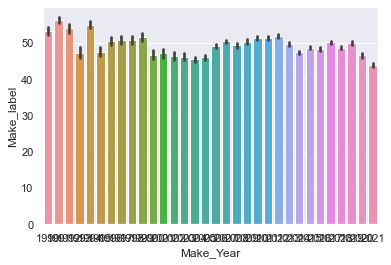

In [190]:
sns.barplot(df['Make_Year'], df['Make_label'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Make_Year', ylabel='Density'>

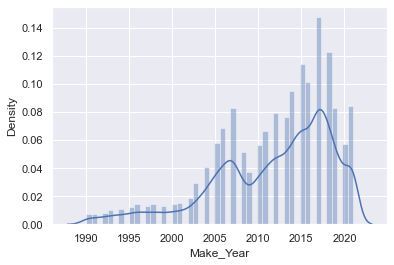

In [191]:
sns.distplot(df['Make_Year'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CC', ylabel='Density'>

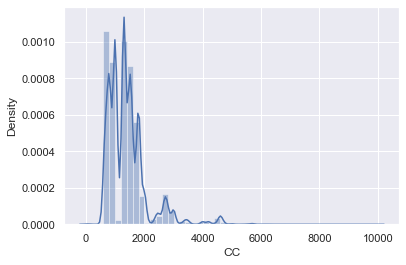

In [192]:
sns.distplot(df['CC'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Make_label', ylabel='Density'>

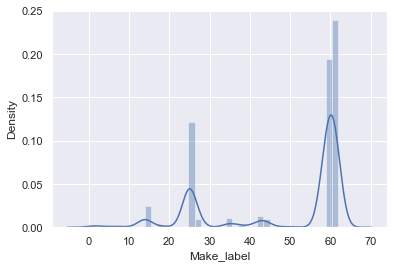

In [193]:
sns.distplot(df['Make_label'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


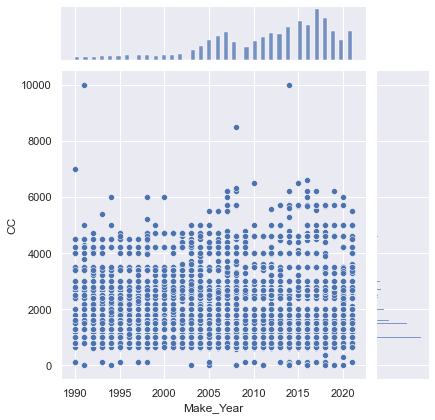

In [194]:
sns.jointplot(df['Make_Year'], df['CC'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


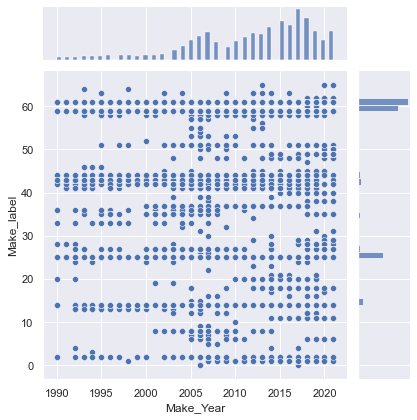

In [195]:
sns.jointplot(df['Make_Year'], df['Make_label'])

In [ ]:
sns.jointplot(df['Price'], df['Make_label'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
sns.jointplot(df[''], df[''], kind="hex")

In [ ]:
sns.jointplot(df[''], df[''], kind="hkde")

In [ ]:

sns.pairplot(df[['', '', '']])

In [ ]:
#for categorical data 
sns.stripplot(df[''],df[''])

In [ ]:
sns.stripplot(df[''],df[''],)

# Step 4 - Training the model

In [81]:
#creating a linear regression object
model = LinearRegression()


In [82]:
df.columns

Index(['Model', 'Version', 'Price', 'Make_Year', 'CC', 'Mileage',
       'Registered City', 'Make_label', 'Adam', 'Audi', 'BMW', 'Bentley',
       'Buick', 'Cadillac', 'Changan', 'Chery', 'Chevrolet', 'Chrysler',
       'Citroen', 'DFSK', 'Daehan', 'Daewoo', 'Daihatsu', 'Datsun', 'Dodge',
       'Dongfeng', 'FAW', 'Fiat', 'Ford', 'GMC', 'Geely', 'Golden', 'Hino',
       'Honda', 'Hummer', 'Hyundai', 'Isuzu', 'JAC', 'JMC', 'JW', 'Jaguar',
       'Jeep', 'Jinbei', 'KIA', 'Land', 'Lexus', 'MG', 'MINI', 'Master',
       'Mazda', 'Mercedes', 'Mitsubishi', 'Nissan', 'Others', 'Peugeot',
       'Plymouth', 'Porsche', 'Prince', 'Proton', 'Range', 'Renault', 'Roma',
       'Rover', 'Sogo', 'Sokon', 'SsangYong', 'Subaru', 'Suzuki', 'Tesla',
       'Toyota', 'United', 'Volkswagen', 'Volvo', 'ZOTYE', 'Assembly_label',
       'Imported', 'Local', 'Transmission_label', 'Automatic', 'Manual'],
      dtype='object')

In [87]:
#model.fit(x,y)values
model.fit(df[['Make_Year', 'CC', 'Make_label']], df['Price'])

LinearRegression()

In [88]:
#making prediction 1
#model.predict([[x1, x2, x3]])

model.predict([[2019, 1800, 1 ]])

array([4694605.98052377])

In [89]:
model.predict([[2019, 1800, 3 ]])

array([4704389.28555781])

In [90]:
#checking the accuracy of the model
#model.score(x,y)

model.score(df[['Make_Year', 'CC', 'Make_label']], df['Price'])

0.4630859449841035